In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-simpsons-characters-dataset/weights.best.hdf5
/kaggle/input/the-simpsons-characters-dataset/annotation.txt
/kaggle/input/the-simpsons-characters-dataset/number_pic_char.csv
/kaggle/input/the-simpsons-characters-dataset/characters_illustration.png
/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/milhouse_van_houten_28.jpg
/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/apu_nahasapeemapetilon_42.jpg
/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/krusty_the_clown_6.jpg
/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/lenny_leonard_22.jpg
/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/marge_simpson_16.jpg
/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/chief_wiggum_41.jpg
/kaggle/input/the-simpsons-characters-dat

In [2]:
!pip install caer

     |████████████████████████████████| 809 kB 924 kB/s 
     |████████████████████████████████| 21.5 MB 41.7 MB/s 


In [3]:
!pip install canaro

  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.18.0 requires tensorflow-io-gcs-filesystem==0.18.0, which is not installed.
explainable-ai-sdk 1.3.2 requires xai-image-widget, which is not installed.
dask-cudf 21.8.3 requires cupy-cuda114, which is not installed.
cudf 21.8.3 requires cupy-cuda110, which is not installed.
beatrix-jupyterlab 3.1.1 requires google-cloud-bigquery-storage, which is not installed.
tensorflow-transform 1.3.0 requires absl-py<0.13,>=0.9, but you have absl-py 0.14.0 which is inco

In [4]:
import os
import caer
import canaro
import numpy as np
import cv2 as cv
import gc

In [5]:
img_size = (80, 80)
channel = 1
char_path = '../input/the-simpsons-characters-dataset/simpsons_dataset'

In [6]:
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path, char)))
    
# Sort in descending order 
char_dict = caer.sort_dict(char_dict, descending=True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [7]:
characters = char_dict[:10]

In [8]:
characters

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079)]

In [9]:
characters = [c[0] for c in characters]

In [10]:
# Create the training data
train = caer.preprocess_from_dir(char_path, characters ,channels=channel, IMG_SIZE=img_size, isShuffle=True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 0.38994455337524414s
[INFO] At 1000 files
[INFO] 1454 files found in 0.13106536865234375s
[INFO] At 1000 files
[INFO] 1452 files found in 0.11834907531738281s
[INFO] At 1000 files
[INFO] 1354 files found in 0.10004043579101562s
[INFO] At 1000 files
[INFO] 1342 files found in 0.0866844654083252s
[INFO] At 1000 files
[INFO] 1291 files found in 0.06428766250610352s
[INFO] At 1000 files
[INFO] 1206 files found in 0.03827190399169922s
[INFO] At 1000 files
[INFO] 1194 files found in 0.031572818756103516s
[INFO] At 1000 files
[INFO] 1193 files found in 0.03167009353637695s
[INFO] At 1000 files
[INFO] 1079 files found in 0.004559040069580078s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 1m 59s


In [11]:
featureSet, labels = caer.sep_train(train, IMG_SIZE=img_size)

In [12]:
from tensorflow.keras.utils import to_categorical

# Normalize the featureSet ==> (0, 1)
featureSet = caer.normalize(featureSet)
labels = to_categorical(labels, len(characters))

In [13]:
featureSet.shape

(13811, 80, 80, 1)

In [14]:
X_train, x_val, y_train, y_val = caer.train_val_split(featureSet, labels, val_ratio=.2)

In [15]:
del train
del featureSet
del labels
gc.collect()

21

In [16]:
BATCH_SIZE=32
EPOCHS = 10

In [17]:
# Image data generator
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)

In [18]:
# Creating the model
model = canaro.models.createSimpsonsModel(IMG_SIZE=img_size, channels=channel, output_dim=len(characters), loss='binary_crossentropy', decay=1e-6, learning_rate=0.001, momentum=0.9, nesterov=True)

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 80, 80, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 78, 78, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 39, 39, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 18, 18, 64)       

In [20]:
from tensorflow.keras.callbacks import LearningRateScheduler
callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]

In [21]:
training = model.fit(train_gen, steps_per_epoch=len(X_train)//BATCH_SIZE, epochs=EPOCHS, validation_data=(x_val, y_val), validation_steps=len(y_val)//BATCH_SIZE, callbacks=callbacks_list)

Epoch 1/10
345/345 [==============================] - 17s 30ms/step - loss: 0.3407 - accuracy: 0.1602 - val_loss: 0.3356 - val_accuracy: 0.1592
Epoch 2/10
345/345 [==============================] - 9s 27ms/step - loss: 0.3238 - accuracy: 0.1615
Epoch 3/10
345/345 [==============================] - 10s 29ms/step - loss: 0.3232 - accuracy: 0.1617
Epoch 4/10
345/345 [==============================] - 9s 26ms/step - loss: 0.3222 - accuracy: 0.1621
Epoch 5/10
345/345 [==============================] - 9s 27ms/step - loss: 0.3141 - accuracy: 0.1956
Epoch 6/10
345/345 [==============================] - 10s 29ms/step - loss: 0.3061 - accuracy: 0.2347
Epoch 7/10
345/345 [==============================] - 9s 27ms/step - loss: 0.3032 - accuracy: 0.2468
Epoch 8/10
345/345 [==============================] - 9s 27ms/step - loss: 0.3002 - accuracy: 0.2660
Epoch 9/10
345/345 [==============================] - 10s 30ms/step - loss: 0.2966 - accuracy: 0.2820
Epoch 10/10
345/345 [========================

In [22]:
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [23]:
test_path = '../input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/bart_simpson_27.jpg'

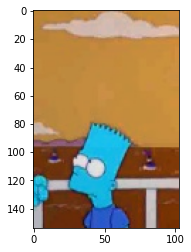

In [24]:
import matplotlib.pyplot as plt
img = cv.imread(test_path)
plt.imshow(img, cmap='gray')
plt.show()

In [25]:
def prepare(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.resize(img, img_size)
    img = caer.reshape(img, img_size, 1)
    return img

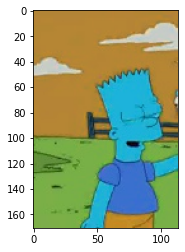

lisa_simpson


In [26]:
test_path = '../input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/bart_simpson_28.jpg'
img = cv.imread(test_path)
plt.imshow(img, cmap='gray')
plt.show()
predictions = model.predict(prepare(img))
print(characters[np.argmax(predictions[0])])